In [54]:
## Import all important libraries
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications import ResNet50, imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, BatchNormalization, Input, \
                                    LSTM, Embedding, Input, TimeDistributed, Bidirectional, Activation, RepeatVector, Concatenate
from keras.preprocessing.sequence import pad_sequences


import matplotlib.pyplot as plt
import pandas as pandas
import numpy as np
from glob import glob
import cv2
import os


In [55]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [56]:
excl = pandas.read_excel("E:/assi/dataset.xlsx")
excl

,Title,Description,Material,Pattern,Neckline,Image_Path
0,Peach Poly Crepe jumpsuit,This stylish foil print kurta from janasya is ...,Crepe,Printed,Round Neck,/images/pic_0.jpg
1,Light Brown Bias Yoke Checks Top,This check pattern top by Work Label is crafte...,Cotton,Checks,Round Neck,/images/pic_1.jpg
2,Off White Geometric Straight Cotton Dobby Top ...,"Featuring elegant printed details, this off wh...",Viscose,Checks,Round Neck,/images/pic_2.jpg
3,Blue Me Away Cape Top,Add an extra dose of style to your casual ward...,Polyester,Solid/Plain,V-Neck,/images/pic_3.jpg
4,Yellow On A High Gown,Yellow polyester georgette maxi dress. Polyest...,Polyester,Solid/Plain,V-Neck,/images/pic_4.jpg
...,...,...,...,...,...,...
495,S.O.I.E. Black Asymmetric Cape Top,Black will never go out of style. This sheer t...,Polyester,Solid/Plain,Round Neck,/images/pic_495.jpg
496,Multi-Color Striped Modern Dress,This multi-color dress by GAP is crafted in co...,Cotton,Stripes,Round Neck,/images/pic_496.jpg
497,Rose Embroidery Summer White Mini Dress,This white dress by Attic Salt is crafted in p...,Polyester,Printed,Boat Neck,/images/pic_497.jpg
498,Black Solid Dhoti Style Jumpsuit With Belt,"Featuring a dhoti style bottom, this black jum...",Polyester,Solid/Plain,Shoulder Straps,/images/pic_498.jpg


In [57]:
## Store the image path and description in list 
path = list(excl['Image_Path'])
Iamge_Description = list(excl["Description"])


In [67]:
imagePath = []
for i in path:
  ip = "E:/assi" + i
  imagePath.append(ip)

In [68]:
imagePath


['E:/assi/images/pic_0.jpg',
 'E:/assi/images/pic_1.jpg',
 'E:/assi/images/pic_2.jpg',
 'E:/assi/images/pic_3.jpg',
 'E:/assi/images/pic_4.jpg',
 'E:/assi/images/pic_5.jpg',
 'E:/assi/images/pic_6.jpg',
 'E:/assi/images/pic_7.jpg',
 'E:/assi/images/pic_8.jpg',
 'E:/assi/images/pic_9.jpg',
 'E:/assi/images/pic_10.jpg',
 'E:/assi/images/pic_11.jpg',
 'E:/assi/images/pic_12.jpg',
 'E:/assi/images/pic_13.jpg',
 'E:/assi/images/pic_14.jpg',
 'E:/assi/images/pic_15.jpg',
 'E:/assi/images/pic_16.jpg',
 'E:/assi/images/pic_17.jpg',
 'E:/assi/images/pic_18.jpg',
 'E:/assi/images/pic_19.jpg',
 'E:/assi/images/pic_20.jpg',
 'E:/assi/images/pic_21.jpg',
 'E:/assi/images/pic_22.jpg',
 'E:/assi/images/pic_23.jpg',
 'E:/assi/images/pic_24.jpg',
 'E:/assi/images/pic_25.jpg',
 'E:/assi/images/pic_26.jpg',
 'E:/assi/images/pic_27.jpg',
 'E:/assi/images/pic_28.jpg',
 'E:/assi/images/pic_29.jpg',
 'E:/assi/images/pic_30.jpg',
 'E:/assi/images/pic_31.jpg',
 'E:/assi/images/pic_32.jpg',
 'E:/assi/images/pic

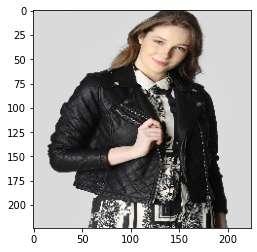

In [59]:

img = cv2.imread('E:/assi/images/pic_62.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
plt.imshow(img)

In [60]:
ResNet = ResNet50(include_top=True)

In [61]:
## Apply ResNet model on all images
last = ResNet.layers[-2].output
modell = Model(inputs = ResNet.input,outputs = last)
modell.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [66]:
for i in imagePath:
    print(i)

./images/pic_0.jpg
./images/pic_1.jpg
./images/pic_2.jpg
./images/pic_3.jpg
./images/pic_4.jpg
./images/pic_5.jpg
./images/pic_6.jpg
./images/pic_7.jpg
./images/pic_8.jpg
./images/pic_9.jpg
./images/pic_10.jpg
./images/pic_11.jpg
./images/pic_12.jpg
./images/pic_13.jpg
./images/pic_14.jpg
./images/pic_15.jpg
./images/pic_16.jpg
./images/pic_17.jpg
./images/pic_18.jpg
./images/pic_19.jpg
./images/pic_20.jpg
./images/pic_21.jpg
./images/pic_22.jpg
./images/pic_23.jpg
./images/pic_24.jpg
./images/pic_25.jpg
./images/pic_26.jpg
./images/pic_27.jpg
./images/pic_28.jpg
./images/pic_29.jpg
./images/pic_30.jpg
./images/pic_31.jpg
./images/pic_32.jpg
./images/pic_33.jpg
./images/pic_34.jpg
./images/pic_35.jpg
./images/pic_36.jpg
./images/pic_37.jpg
./images/pic_38.jpg
./images/pic_39.jpg
./images/pic_40.jpg
./images/pic_41.jpg
./images/pic_42.jpg
./images/pic_43.jpg
./images/pic_44.jpg
./images/pic_45.jpg
./images/pic_46.jpg
./images/pic_47.jpg
./images/pic_48.jpg
./images/pic_49.jpg
./images/p

In [69]:
# Lets predict using ResNet model and add it in a dictionary
images_features = {}
count = 0
for i in imagePath:
    img1 = cv2.imread(i)
    
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img1 = cv2.resize(img1, (224,224))
    
    img1 = img1.reshape(1,224,224,3)
    pred = modell.predict(img1).reshape(2048,)
        
    # img_name = i.split('/')[-1]
    
    images_features[i] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500


In [70]:
 images_features['E:/assi/images/pic_82.jpg']

array([1.6882412 , 2.1671557 , 0.07276706, ..., 0.03309822, 1.4828861 ,
       0.19127345], dtype=float32)

In [71]:
dataa = {}
for i, j in zip(imagePath, Iamge_Description):
  dataa[i] = j

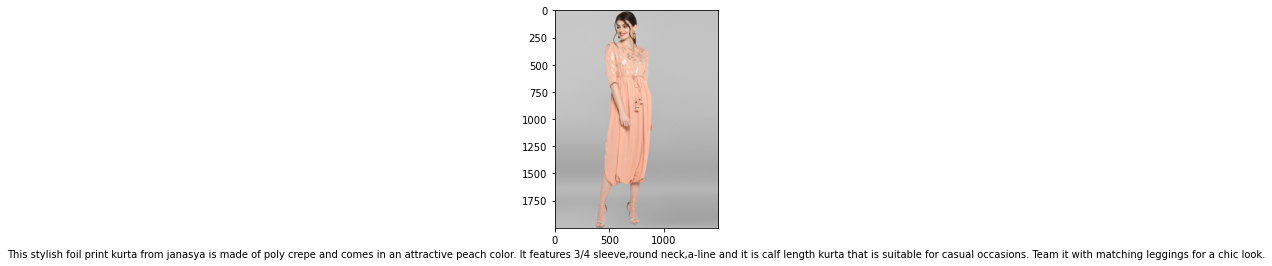

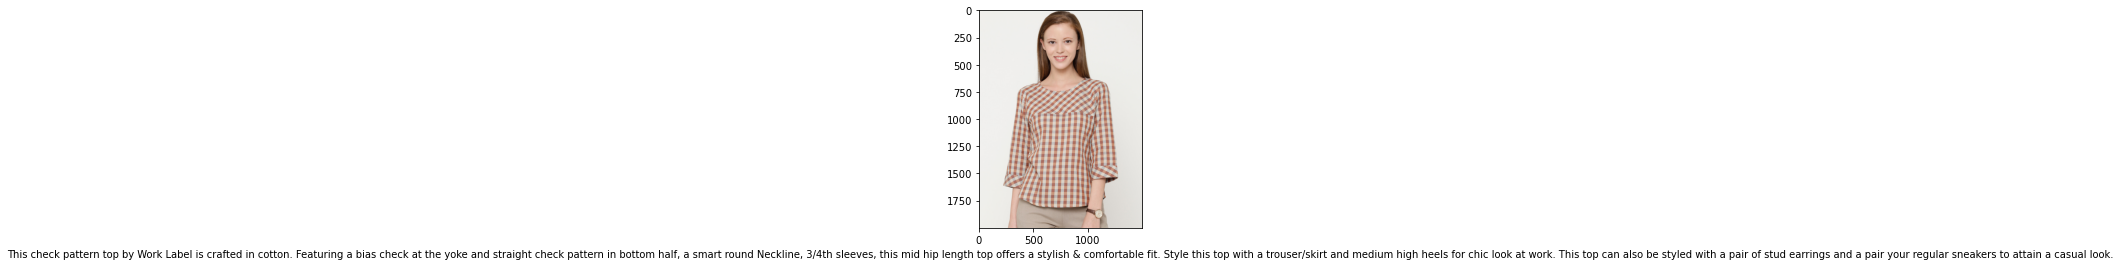

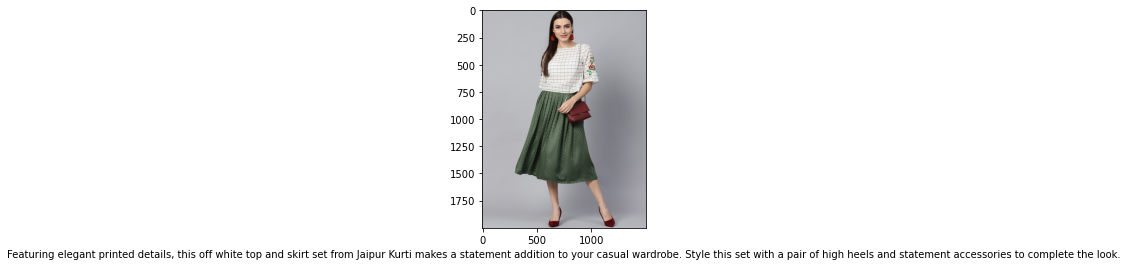

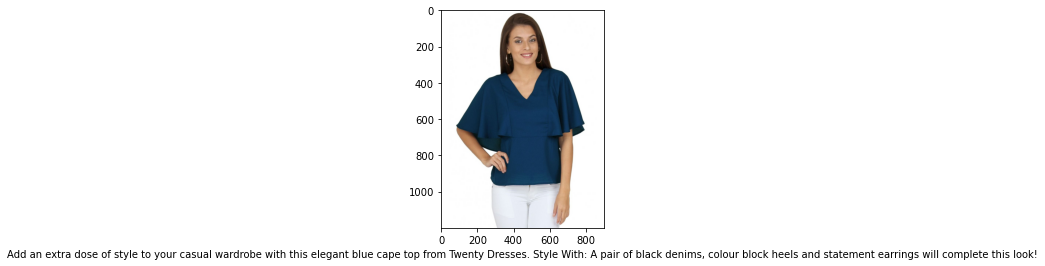

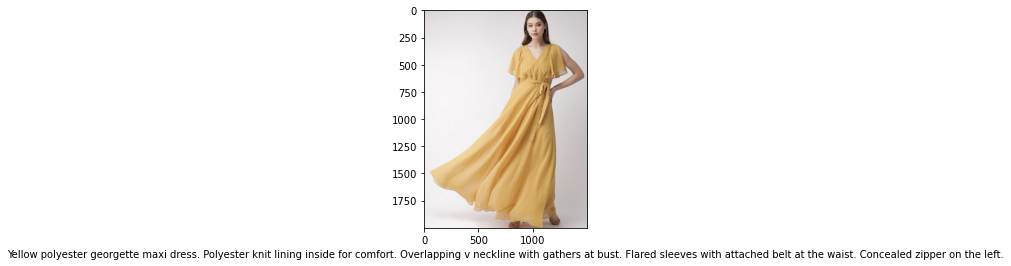

In [72]:
for i in range(5):
  plt.figure()
  img_name = imagePath[i]
  
  
  img = cv2.imread(img_name)
  
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.xlabel(dataa[img_name])
  plt.imshow(img)

In [73]:
def preprocessed(txt):
    modified = txt.lower()
    ## Add start and end element in description
    modified = 'startofseq ' + modified + ' endofseq'   
    return modified

In [74]:
for k,v in dataa.items():
      dataa[k] = preprocessed(v)

In [75]:
dataa['E:/assi/images/pic_199.jpg']

'startofseq olive polyester crepe dress. wrap style v neckline with three fourth sleeves. button detail on the left thigh. elasticated waist with an attached tie up belt. ruching on the sleeve sides with tie up detailing. fit and flare silhouette. endofseq'

In [76]:
count_words = {}
for k,v in dataa.items():
  
  for word in v.split():
    if word not in count_words:

      count_words[word] = 0

    else:
      count_words[word] += 1

In [77]:
count_words['style']

231

In [78]:
len(count_words)

1934

In [79]:
for k, v in dataa.items():
   
  encoded = []
  for word in v.split():  
    encoded.append(count_words[word])

  dataa[k] = encoded

In [80]:
dataa['E:/assi/images/pic_199.jpg']

[499,
 5,
 119,
 45,
 46,
 23,
 231,
 39,
 59,
 713,
 14,
 12,
 34,
 44,
 19,
 136,
 472,
 14,
 0,
 24,
 55,
 713,
 80,
 8,
 26,
 48,
 4,
 6,
 136,
 472,
 14,
 5,
 713,
 26,
 48,
 9,
 52,
 921,
 34,
 40,
 499]

In [81]:
max_len = 0
for k, v in dataa.items():

  if len(v) > max_len:
    max_len = len(v)
    print(v)

[499, 562, 18, 2, 28, 7, 166, 1, 238, 25, 200, 1, 45, 921, 18, 226, 80, 1, 7, 2, 175, 128, 2, 0, 0, 921, 175, 238, 0, 13, 7, 45, 238, 1, 308, 59, 5, 35, 175, 713, 6, 4, 308, 876, 32, 167, 499]
[499, 562, 7, 6, 197, 114, 13, 5, 238, 126, 226, 0, 40, 876, 1, 7, 137, 472, 12, 921, 29, 7, 6, 226, 14, 0, 876, 7, 46, 12, 27, 56, 562, 1, 3, 13, 197, 0, 876, 18, 44, 13, 66, 231, 562, 197, 713, 876, 0, 921, 0, 80, 151, 308, 32, 37, 137, 0, 562, 197, 21, 4, 39, 4, 713, 876, 183, 200, 4, 29, 921, 876, 183, 126, 75, 19, 326, 3, 876, 59, 167, 499]
[499, 65, 64, 76, 5, 46, 26, 48, 59, 19, 713, 876, 11, 3, 30, 10, 137, 472, 69, 12, 921, 44, 13, 69, 63, 308, 51, 921, 53, 5, 1, 137, 472, 11, 308, 45, 64, 23, 10, 20, 69, 713, 876, 5, 2, 308, 472, 5, 126, 2, 23, 238, 3, 226, 308, 876, 3, 19, 45, 238, 876, 3, 200, 9, 16, 44, 45, 10, 36, 28, 151, 876, 12, 24, 921, 7, 16, 57, 9, 49, 7, 7, 226, 2, 1, 499]
[499, 562, 65, 64, 76, 214, 114, 2, 238, 126, 226, 45, 921, 128, 876, 22, 66, 0, 59, 12, 52, 0, 117, 166

In [82]:
max_len

88

In [83]:
VOCAB_SIZE = len(count_words)

def generator(photo, caption):
    
  X = []
  y_in = []
  y_out = []
  
  for k, v in caption.items():
    
    for i in range(1, len(v)):
      X.append(photo[k])         ## Appending image featurees to X var

      in_seq= [v[:i]]            ## splitting the description in a sequence i.e., 0-1, 0-1-2, 0-1-2-3, ........... 
      out_seq = v[i]             ## Next word

      ## use pad sequence to convert the variable length to max_len i.e., 88
      in_seq = pad_sequences(in_seq, maxlen=max_len, padding='post', truncating='post')[0]
      out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

      y_in.append(in_seq)
      y_out.append(out_seq)
          
  return X, y_in, y_out

In [84]:
X, y_in, y_out = generator(images_features, dataa)

In [85]:
len(X), len(y_in), len(y_out)

(18477, 18477, 18477)

In [86]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [87]:
X.shape, y_in.shape, y_out.shape

((18477, 2048), (18477, 88), (18477, 1934))

In [88]:
embedding_size = 128
max_len = max_len
vocab_size = len(count_words)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 88, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 88, 128)           247552    
_________________________________________________________________
lstm (LSTM)                  (None, 88, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 88, 128)           32896     
Total params: 674,688
Traina

In [91]:
model.fit([X, y_in], y_out, batch_size=512, epochs=100)

Epoch 1/100
37/37 [==============================] - 586s 16s/step - loss: 3.5410 - accuracy: 0.1296
Epoch 2/100
37/37 [==============================] - 3139s 85s/step - loss: 3.5012 - accuracy: 0.1349
Epoch 3/100
37/37 [==============================] - 300s 8s/step - loss: 3.4621 - accuracy: 0.1385
Epoch 4/100
37/37 [==============================] - 397s 11s/step - loss: 3.4309 - accuracy: 0.1410
Epoch 5/100
37/37 [==============================] - 545s 15s/step - loss: 3.3858 - accuracy: 0.1452
Epoch 6/100
37/37 [==============================] - 573s 15s/step - loss: 3.3325 - accuracy: 0.1555
Epoch 7/100
37/37 [==============================] - 551s 15s/step - loss: 3.3123 - accuracy: 0.1559
Epoch 8/100
37/37 [==============================] - 450s 12s/step - loss: 3.2701 - accuracy: 0.1613
Epoch 9/100
37/37 [==============================] - 545s 15s/step - loss: 3.2306 - accuracy: 0.1693
Epoch 10/100
37/37 [==============================] - 549s 15s/step - loss: 3.1907 - accura

In [92]:
inv_dict = {v:k for k, v in count_words.items()}

In [93]:
## save the model
model.save('image_desc.h5')

In [117]:
## function to convert the image in machine readable format
def getImage(x):
  
     #test_img = imagePath[x]

    test_img = cv2.imread(x)
    
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
  
    return test_img

In [118]:
test_feature = modell.predict(getImage('E:/assi/images/pic_82.jpg')).reshape(1,2048)

In [119]:
text_inp = ['startofseq']

count = 0
desc = ''
while count < 25:
  count += 1

  encoded = []
  for i in text_inp:
    encoded.append(count_words[i])

  encoded = [encoded]

  encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=max_len)


  prediction = np.argmax(model.predict([test_feature, encoded]))             ## Returns a highest prob word
 
  sampled_word = inv_dict[prediction]

  desc = desc + ' ' + sampled_word
      
  if sampled_word == 'endofseq':
    break

  text_inp.append(sampled_word)

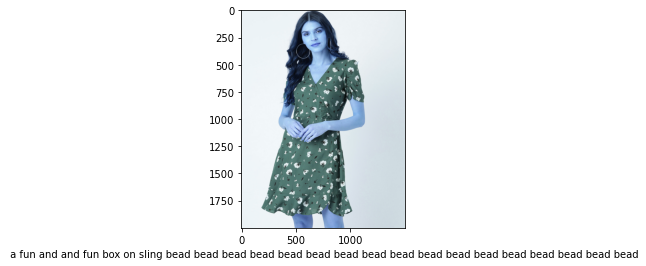

In [121]:

imag = cv2.imread('E:/assi/images/pic_88.jpg')
#imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
plt.imshow(imag)
plt.xlabel(desc);

In [130]:
def getImage(x):
  
  test_img_path = imagePath[x]

  test_img = cv2.imread(test_img_path)
  test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

  test_img = cv2.resize(test_img, (224,224))

  test_img = np.reshape(test_img, (1,224,224,3))
  
  return test_img

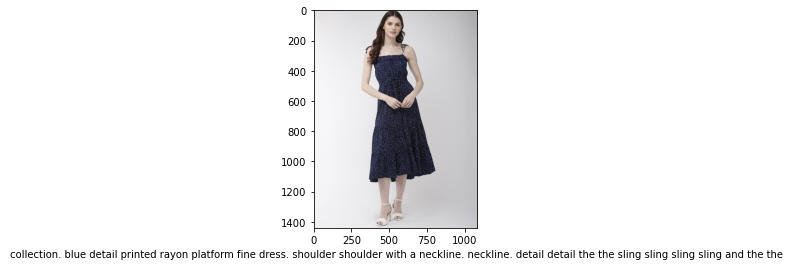

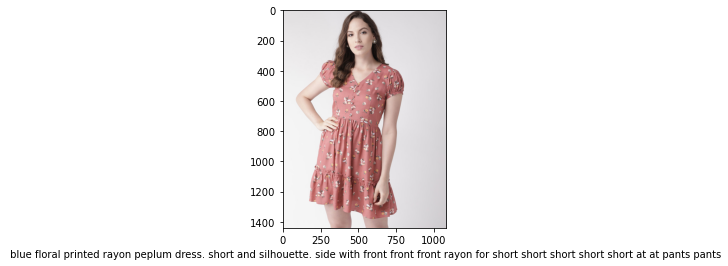

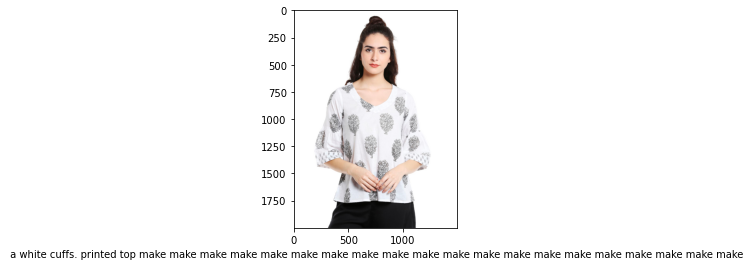

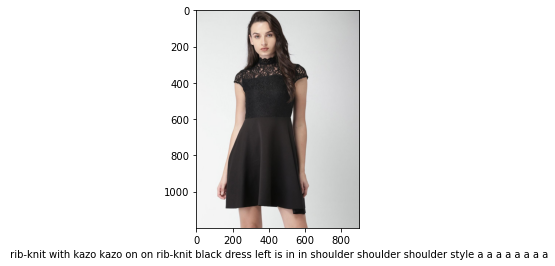

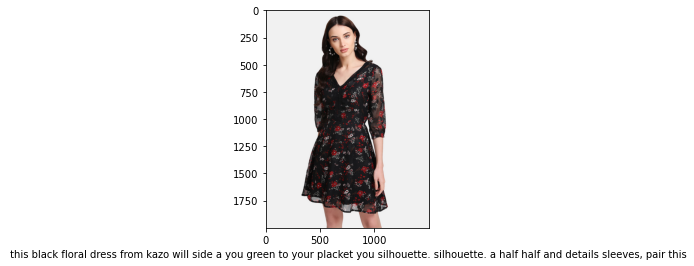

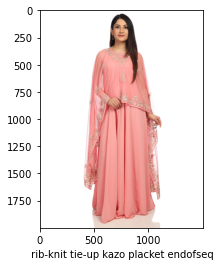

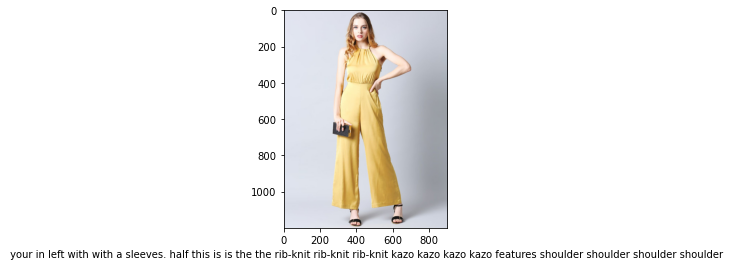

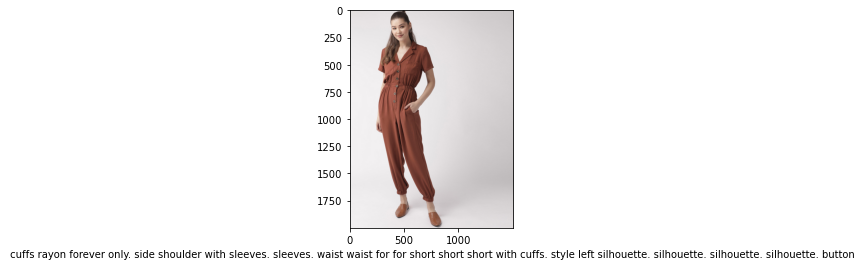

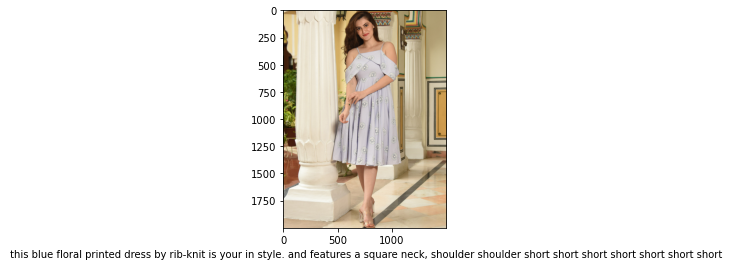

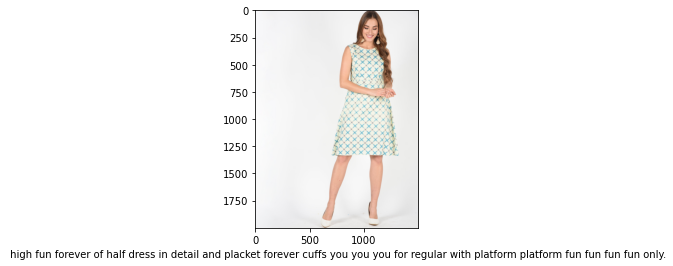

In [137]:
for i in range(10):
  
  no = np.random.randint(100,500,(1,1))[0,0]
  test_feature = modell.predict(getImage(no)).reshape(1,2048)
  
  test_img_path = imagePath[no]
  test_img = cv2.imread(test_img_path)
  test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


  text_inp = ['startofseq']

  count = 0
  desc = ''
  while count < 25:
    count += 1

    encoded = []
    for i in text_inp:
      encoded.append(count_words[i])

    encoded = [encoded]

    encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=max_len)


    prediction = np.argmax(model.predict([test_feature, encoded]))

    sampled_word = inv_dict[prediction]

    desc = desc + ' ' + sampled_word
        
    if sampled_word == 'endofseq':
      break

    text_inp.append(sampled_word)
      
  plt.figure()
  plt.imshow(test_img)
  plt.xlabel(desc)